In [3209]:
import matplotlib 
import matplotlib.pyplot as plt, mpld3
import numpy as np
%matplotlib inline
import cPickle as pkl
from copy_data import CopyDataGen

batch_size = 4
max_len = 90
inp_size = 10
seed = 5
n_in = 10
n_hids = 180
mem_size = 60
mem_nel = 120
deep_out_size = 200
rng = np.random.RandomState(seed)

vdata_gen = CopyDataGen(batch_size,
                        max_len,
                        inp_size,
                        rng=rng,
                        seed=seed,
                        rnd_len=False)

batch = vdata_gen.next()

#mpld3.enable_notebook()


In [3210]:
fl = "ntm_no_ms_on_copy_task_inspections.pkl"
insps = pkl.load(open(fl, "rb"))
print insps.keys()

['h_t', 'mem_read', 'read_weights', 'data_x', 'probs', 'write_weights', 'm_t']


In [3211]:
insps['h_t'].shape

(182, 4, 100)

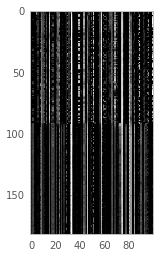

In [3212]:
plt.imshow(insps['h_t'][:, 0, :], vmin=0, vmax=1, cmap="gray", interpolation="nearest")

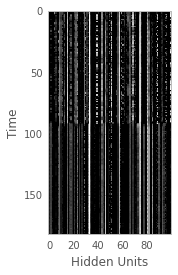

In [3213]:
plt.imshow(insps['h_t'][:, 1, :], vmin=0, vmax=1, cmap="gray", interpolation="nearest")
plt.ylabel("Time")
plt.xlabel("Hidden Units")

In [3214]:
abs_diff = abs(insps['h_t'][:, 2, :] - insps['h_t'][:, 0, :])

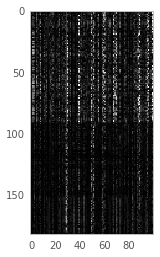

In [3215]:
plt.imshow(abs_diff, vmin=0, vmax=1, cmap="gray", interpolation="nearest")

In [3153]:
insps['read_weights'].shape

(122, 4, 128)

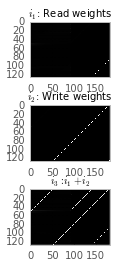

In [3216]:
f, (ax1, ax2, ax3) = plt.subplots(3)
i = 3
ax1.imshow(insps['read_weights'][:, i, :].T, cmap="gray", shape=(1024, 768), interpolation="none")
ax1.set_title("$i_1$: Read weights", size=10)
ax2.imshow(insps['write_weights'][:, i, :].T, cmap="gray", shape=(1024, 768), interpolation="none")
ax2.set_title("$i_2$: Write weights", size=10)
ax3.imshow(insps['write_weights'][:, i, :].T+insps['read_weights'][:, i, :].T, cmap="gray", shape=(1024, 768), interpolation="none")
ax3.set_title("$i_3: i_1 + i_2$", size=10)
f.savefig("no_deepout_sw5_30_ntm_weightings.pdf", dpi=600)

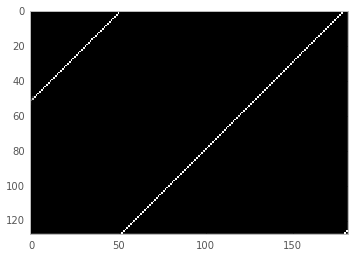

In [3217]:
plt.imshow(insps['write_weights'][:, 0, :].T, cmap="gray", interpolation="none")

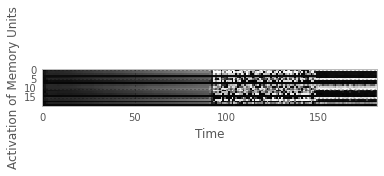

In [3218]:
plt.imshow(insps['mem_read'][:, 2, :].T, cmap="gray", interpolation="none")
plt.xlabel("Time")
plt.ylabel("Activation of Memory Units")
plt.savefig("memories_read_t30.pdf", dpi=600)

In [3205]:
insps['m_t'].shape

(182, 4, 128, 20)

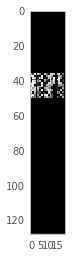

In [3193]:
plt.imshow(abs(insps['m_t'][15, 1, :, :] - insps['m_t'][1, 3, :, :]), cmap="gray", interpolation="none")

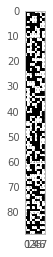

In [3206]:
plt.imshow(insps['probs'][max_len+2:-1, 3, :-2], vmin=0, vmax=1, cmap="gray", interpolation="none")

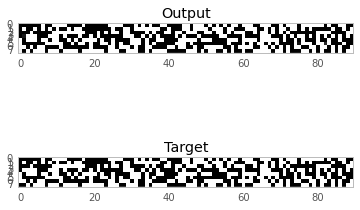

In [3207]:
f, (ax1, ax2) = plt.subplots(2)
i = 3
ax1.imshow(insps['probs'][max_len+2:, i, :-2].T, vmin=0, vmax=1, cmap="gray", interpolation="none")
ax1.set_title("Output")
ax1.grid(False)
ax2.imshow(insps['data_x'][1:max_len+1, i, :-2].T, vmin=0, vmax=1, cmap="gray", interpolation="none")
ax2.grid(False)
ax2.set_title("Target")
f.savefig("no_deepout_sw5_60_ntm_out_generalization.pdf", dpi=600)


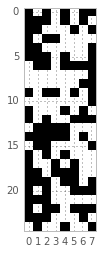

In [3024]:
plt.imshow(insps['data_x'][1:max_len+1, 3, :-2], vmin=0, vmax=1, cmap="gray", interpolation="nearest")

In [3008]:
insps['data_x'][1:max_len+1, 3, :-1].shape

(25, 9)

In [3009]:
pfile = "ntm_powerup_on_copy_task_model_params.pkl"
params = pkl.load(open(pfile, "rb"))
pcenter = params["ntm_model_powerup_out_center"]
power = params["ntm_model_powerup_out_power"]


(array([  3.69328567,   1.23109522,   1.23109522,   0.        ,
          0.        ,   0.        ,   1.23109522,   2.46219045,
          1.23109522,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.23109522,   0.        ,
          3.69328567,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.23109522,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.23109522,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.23109522,   0.        ,   1.23109522,   1.23109522,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   1.23109522,
          0.        ,   2.46219045,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

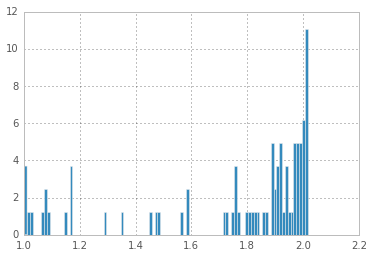

In [2933]:
plt.hist(np.log(np.exp(power)+1)+1, bins=100, normed=True)

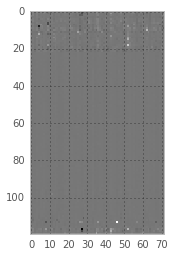

In [2719]:
plt.imshow(params['ntm_model_ntm_Memory'], cmap="gray", interpolation="none")

In [2934]:
params['ntm_model_ntm_Memory']

array([[ 0.02252089, -0.07695664,  0.02553368, ...,  0.01981246,
         0.01306187, -0.01900376],
       [ 0.02587906, -0.07429083,  0.00450548, ...,  0.03041192,
         0.00574011, -0.02933634],
       [ 0.01337879, -0.06616098,  0.01252186, ...,  0.0201813 ,
         0.01160518, -0.02135331],
       ..., 
       [ 0.02470454, -0.07489435,  0.03649049, ...,  0.01592691,
         0.01466752, -0.02582761],
       [ 0.03449517, -0.08477005,  0.01319468, ...,  0.02174957,
         0.01901904, -0.01887765],
       [ 0.03221725, -0.07922398,  0.0042048 , ...,  0.03735008,
         0.01243836, -0.01532519]], dtype=float32)

(array([  2.40490590e-03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.40490590e-03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.21471770e-03,   0.00000000e+00,
          0.00000000e+00,   2.40490590e-03,   2.40490590e-03,
          0.00000000e+00,   0.00000000e+00,   4.80981180e-03,
          2.40490590e-03,   1.20245295e-02,   2.40490590e-03,
          0.00000000e+00,   9.61962360e-03,   1.68343413e-02,
          2.40490590e-02,   8.41717065e-02,   1.89987566e-01,
          8.48931782e-01,   1.62643786e+01,   2.52034138e+00,
        

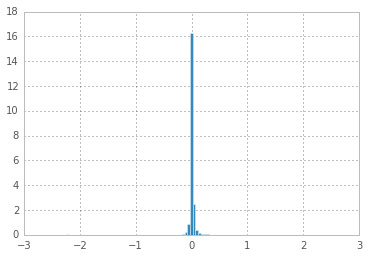

In [1382]:
plt.hist(params['ntm_model_ntm_Memory'].flatten(), bins=100, normed=True)

In [1623]:
pfiles = "ntm_no_ms_on_copy_task_model_params.pkl"
params = pkl.load(open(pfile, "rb"))


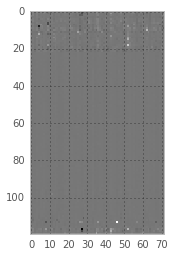

In [1624]:
plt.imshow(params['ntm_model_ntm_Memory'], cmap="gray", interpolation="none")

(array([  2.40490590e-03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.40490590e-03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.21471770e-03,   0.00000000e+00,
          0.00000000e+00,   2.40490590e-03,   2.40490590e-03,
          0.00000000e+00,   0.00000000e+00,   4.80981180e-03,
          2.40490590e-03,   1.20245295e-02,   2.40490590e-03,
          0.00000000e+00,   9.61962360e-03,   1.68343413e-02,
          2.40490590e-02,   8.41717065e-02,   1.89987566e-01,
          8.48931782e-01,   1.62643786e+01,   2.52034138e+00,
        

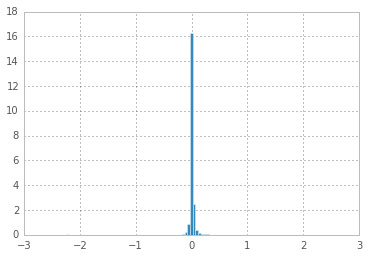

In [1625]:
plt.hist(params['ntm_model_ntm_Memory'].flatten(), bins=100, normed=True)